# SPROCKET CENTRAL PVT LTD.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [8]:
#getting list of sheet names
df_dict = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=None, header = 0)
df_dict.keys()

dict_keys(['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'])

In [9]:
#creating separate dataframes for each sheet for easy analysis

transactions = df_dict.get('Transactions')
newcust = df_dict.get('NewCustomerList')
custdemo = df_dict.get('CustomerDemographic')
address = df_dict.get('CustomerAddress')

## Data Quality Assessment

### SHEET 1 - Transactions

In [10]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [11]:
transactions.shape

(20000, 13)

In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Observations

NULL VALUES: We can see there are some null values in columns `online_order`, `brand`, `product_line`, `product_class`, `product_size`, `standard_cost`, `product_first_sold_date`.

CONSISTENCY: `product_first_sold_date` looks like it is a number of days since a certain time. We need to change the datatype from float64 to date format.

DATA TYPE : `online_order` is actually a categorical column. So we change it from float64 to category and also change the values to more meaningful labels where '0' and '1' represent respective their categories.

#### DISTINCT CUSTOMER IDs

In [13]:
transactions.customer_id.nunique()

3494

#### MISSING VALUES

In [14]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [15]:
#percentage missing values in each column

transactions.isnull().sum()/len(transactions) * 100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

**Observation** - We can see there are less than 2% missing values in any any column, if any. We will remove them from the training dataset since it is not a key column and we have sufficient data to make analysis

#### DUPLICATES

In [16]:
# to find duplicates
transactions.duplicated().sum()

0

**Observation** - Data does not have any duplicates!

### Checking for consistency and validity

In [17]:
transactions['online_order'].unique()

array([ 0.,  1., nan])

In [18]:
transactions['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [19]:
transactions['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [20]:
transactions['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

In [21]:
transactions['product_class'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [22]:
transactions['product_size'].unique()

array(['medium', 'large', 'small', nan], dtype=object)

**Observation** - Our data is consistent and does not have any invalid values besides null records.



## DATA CLEANING 

### Data Type

In [23]:
reference_date = pd.to_datetime('1899-12-30')

# Convert 'product_first_sold_date' column to datetime

transactions['product_first_sold_date'] = reference_date + pd.to_timedelta(transactions['product_first_sold_date'], unit='D')

In [24]:
transactions['order_status'] = transactions['order_status'].astype("category")
transactions['brand'] = transactions['brand'].astype("category")
transactions['product_line'] = transactions['product_line'].astype("category")
transactions['product_class'] = transactions['product_class'].astype("category")
transactions['product_size'] = transactions['product_size'].astype("category")

In [25]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  category      
 6   brand                    19803 non-null  category      
 7   product_line             19803 non-null  category      
 8   product_class            19803 non-null  category      
 9   product_size             19803 non-null  category      
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

#### MISSING VALUES 

In [26]:
transactions.dropna(inplace=True)

In [27]:
#percentage missing values in each column
transactions.isnull().sum()/len(transactions) *100

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

**Observations** = No more missing values 

In [28]:
transactions['online_order'].replace({0.0 : 'False', 1.0 : 'True'}, inplace = True)

In [29]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [30]:
transactions.describe(include=['category'])

,order_status,brand,product_line,product_class,product_size
count,19445,19445,19445,19445,19445
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19273,4169,13920,13587,12767


### SHEET 2 - Customer Demographic

In [31]:
custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Unnamed: 13
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,NaN
1,66,Anselm,Gawne,Male,46,2002-03-11 00:00:00,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0,NaN
2,1888,Sibyl,Scholtz,Female,67,2002-01-26 00:00:00,Food Chemist,Health,Mass Customer,N,NaN,Yes,1.0,NaN
3,3435,Stevena,Allcock,Female,80,2002-01-15 00:00:00,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0,NaN
4,2858,Benedicto,Radki,Male,4,2002-01-09 00:00:00,Recruiting Manager,NaN,Mass Customer,N,testâ testâ«,Yes,1.0,NaN


In [32]:
custdemo.shape

(4000, 14)

In [33]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

### Observations

Null Values = last_name, DOB, job_industry_category, job_title, default, tenure has some missing values 

Default columns carries some meta data, which is unncessary for us

gender,job_title, job_industry_category, wealth_segment , owns_car, deceased_indicator are in objects data type which can be converted into category data type 

In [34]:
custdemo.customer_id.nunique()

4000

In [35]:
custdemo.gender.unique()

array(['U', 'Male', 'Female', 'M', 'Femal', 'F'], dtype=object)

In [36]:
custdemo['job_industry_category'].unique()

array(['IT', 'Argiculture', 'Health', nan, 'Manufacturing', 'Retail',
       'Telecommunications', 'Financial Services', 'Entertainment',
       'Property'], dtype=object)

In [37]:
custdemo['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [38]:
custdemo['wealth_segment'].unique()

array(['Affluent Customer', 'High Net Worth', 'Mass Customer'],
      dtype=object)

In [39]:
custdemo['owns_car'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
custdemo['tenure'].unique()

array([20.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 19., 17., 22., 12.,
       14., 13., 11., 10.,  9., 18., 16., 15., 21., nan])

Observation

CONSISTENCY: There is inconsistent data in gender.

RELEVANCE:We can also remove values corresponding to deceased indiactor = Y, since we would be analysing the data only for customers who are alive.

In [41]:
custdemo.duplicated().sum()

0

**DATA CLEANING**

- drop unnecessary column default
- values corrsponding to Y in deceased indicator
- changing data types
- column gender
- null value

In [42]:
custdemo.drop('default', axis = 1,inplace = True)

In [43]:
custdemo = custdemo.drop(custdemo.index[custdemo['deceased_indicator'] == 'Y'])

In [44]:
custdemo['deceased_indicator'].unique()

array(['N'], dtype=object)

In [45]:
custdemo['first_name'] = custdemo['first_name'].astype("category")
custdemo['last_name'] = custdemo['last_name'].astype("category")
custdemo['gender'] = custdemo['gender'].astype("category")
custdemo['job_title'] = custdemo['job_title'].astype("category")
custdemo['job_industry_category'] = custdemo['job_industry_category'].astype("category")
custdemo['wealth_segment'] = custdemo['wealth_segment'].astype("category")
custdemo['deceased_indicator'] = custdemo['deceased_indicator'].astype("category")
custdemo['owns_car'] = custdemo['owns_car'].astype("category")

In [46]:
custdemo.gender.unique()

['U', 'Male', 'Female', 'M', 'Femal', 'F']
Categories (6, object): ['F', 'Femal', 'Female', 'M', 'Male', 'U']

In [47]:
custdemo.replace({'F' : 'Female', 'M' : 'Male', 'Femal' : 'Female'}, inplace = True)

In [48]:
custdemo.gender.unique()

['U', 'Male', 'Female']
Categories (3, object): ['Female', 'Male', 'U']

In [49]:
custdemo.isnull().sum()

customer_id                               0
first_name                                0
last_name                               125
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                      87
job_title                               506
job_industry_category                   656
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                   87
Unnamed: 13                            3997
dtype: int64

In [50]:
custdemo.isnull().sum()/ len (custdemo) * 100

customer_id                             0.000000
first_name                              0.000000
last_name                               3.126563
gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
DOB                                     2.176088
job_title                              12.656328
job_industry_category                  16.408204
wealth_segment                          0.000000
deceased_indicator                      0.000000
owns_car                                0.000000
tenure                                  2.176088
Unnamed: 13                            99.974987
dtype: float64

Observation - For 'job_title' and 'job_industry_segment' we can impute the values using mode. last_name and tenuredo not look like a key columns for our analysis, so we can leave it like that for now.

In [51]:
custdemo['job_title'].fillna(custdemo['job_title'].mode()[0], inplace = True)
custdemo['job_industry_category'].fillna(custdemo['job_industry_category'].mode()[0], inplace = True)

In [52]:
custdemo.isnull().sum()/ len (custdemo) * 100

customer_id                             0.000000
first_name                              0.000000
last_name                               3.126563
gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
DOB                                     2.176088
job_title                               0.000000
job_industry_category                   0.000000
wealth_segment                          0.000000
deceased_indicator                      0.000000
owns_car                                0.000000
tenure                                  2.176088
Unnamed: 13                            99.974987
dtype: float64

## SHEET3 - CUSTOMER ADDRESS

In [53]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [54]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [55]:
address.shape

(3999, 6)

In [56]:
address.customer_id.nunique()

3999

In [57]:
address.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [58]:
address.country.unique()

array(['Australia'], dtype=object)

In [59]:
address.duplicated().sum()

0

In [60]:
address.state.replace({'NSW':'New South Wales', 'VIC':'Victoria'},inplace=True)

In [61]:
address.state.unique()

array(['New South Wales', 'QLD', 'Victoria'], dtype=object)

In [62]:
address['address'] = address['address'].astype('category')
address['state'] = address['state'].astype('category')
address['country'] = address['country'].astype('category')

In [63]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         3999 non-null   int64   
 1   address             3999 non-null   category
 2   postcode            3999 non-null   int64   
 3   state               3999 non-null   category
 4   country             3999 non-null   category
 5   property_valuation  3999 non-null   int64   
dtypes: category(3), int64(3)
memory usage: 270.0 KB


## SHEET4 - NewCustomersList

In [64]:
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.59,0.7375,0.921875,0.783594,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.69,0.6900,0.862500,0.733125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.48,0.4800,0.480000,0.480000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.40,0.5000,0.500000,0.500000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.94,0.9400,1.175000,1.175000,4,4,1.703125


In [65]:
#removing the unnamed columns

newcust.drop(newcust.columns[newcust.columns.str.contains('^Unnamed')], axis=1, inplace=True)

In [66]:
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [67]:
newcust.shape

(1000, 18)

In [68]:
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [69]:
newcust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [70]:
newcust.duplicated().sum()

0

In [71]:
newcust['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [72]:
newcust['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

In [73]:
newcust['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [74]:
newcust['deceased_indicator'].unique()

array(['N'], dtype=object)

In [75]:
newcust['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
newcust['tenure'].unique()

array([14, 16, 10,  5, 19, 22,  8, 17,  3,  9,  4, 11, 12, 13,  7, 20, 15,
        6, 18, 21,  2,  1,  0], dtype=int64)

In [77]:
newcust['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [78]:
newcust['country'].unique()

array(['Australia'], dtype=object)

In [79]:
newcust['property_valuation'].unique()

array([ 6, 11,  5,  1,  9,  7, 10,  8,  4,  2, 12,  3], dtype=int64)

In [80]:
newcust['first_name'] = newcust['first_name'].astype("category")
newcust['last_name'] = newcust['last_name'].astype("category")
newcust['gender'] = newcust['gender'].astype("category")
newcust['job_title'] = newcust['job_title'].astype("category")
newcust['job_industry_category'] = newcust['job_industry_category'].astype("category")
newcust['wealth_segment'] = newcust['wealth_segment'].astype("category")
newcust['deceased_indicator'] = newcust['deceased_indicator'].astype("category")
newcust['owns_car'] = newcust['owns_car'].astype("category")
newcust['address'] = newcust['address'].astype('category')
newcust['state'] = newcust['state'].astype('category')
newcust['country'] = newcust['country'].astype('category')

In [81]:
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   first_name                           1000 non-null   category
 1   last_name                            971 non-null    category
 2   gender                               1000 non-null   category
 3   past_3_years_bike_related_purchases  1000 non-null   int64   
 4   DOB                                  983 non-null    object  
 5   job_title                            894 non-null    category
 6   job_industry_category                835 non-null    category
 7   wealth_segment                       1000 non-null   category
 8   deceased_indicator                   1000 non-null   category
 9   owns_car                             1000 non-null   category
 10  tenure                               1000 non-null   int64   
 11  address           

# EXPLORATORY DATA ANALYSIS

#### Feature Engineering

In [82]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


#### Created new column 'profit'

In [83]:
transactions['Profit'] = transactions['list_price'] - transactions['standard_cost']

In [84]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


#### Calculating 'age' from DOB

In [87]:
custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Unnamed: 13
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,NaN
1,66,Anselm,Gawne,Male,46,2002-03-11 00:00:00,Account Executive,Argiculture,High Net Worth,N,No,1.0,NaN
2,1888,Sibyl,Scholtz,Female,67,2002-01-26 00:00:00,Food Chemist,Health,Mass Customer,N,Yes,1.0,NaN
3,3435,Stevena,Allcock,Female,80,2002-01-15 00:00:00,Senior Editor,Manufacturing,Affluent Customer,N,No,1.0,NaN
4,2858,Benedicto,Radki,Male,4,2002-01-09 00:00:00,Recruiting Manager,Manufacturing,Mass Customer,N,Yes,1.0,NaN


In [90]:
custdemo.DOB.dtype

dtype('O')

In [97]:
import pandas as pd
from datetime import datetime

# Assuming 'DOB' is your date of birth column in the custdemo DataFrame
# Convert 'DOB' column to datetime and handle invalid dates by setting them to NaT (Not-a-Time)
custdemo['DOB'] = pd.to_datetime(custdemo['DOB'], errors='coerce')

# Filter out rows with NaT (invalid) values in the 'DOB' column
custdemo = custdemo.dropna(subset=['DOB'])

# Calculate the current date
current_date = datetime.now()

# Calculate age in years
custdemo['Age'] = ((current_date - custdemo['DOB']).dt.days / 365).astype(int)

# Print the updated DataFrame
print(custdemo)

      customer_id first_name last_name  gender  \
0              34   Jephthah  Bachmann       U   
1              66     Anselm     Gawne    Male   
2            1888      Sibyl   Scholtz  Female   
3            3435    Stevena   Allcock  Female   
4            2858  Benedicto     Radki    Male   
...           ...        ...       ...     ...   
3908          658       Donn   Bonnell    Male   
3909         2413      Abbey    Murrow    Male   
3910         3410    Merrili   Brittin  Female   
3911         1092     Katlin   Creddon  Female   
3912          720     Darrel     Canet    Male   

      past_3_years_bike_related_purchases        DOB  \
0                                      59 1843-12-21   
1                                      46 2002-03-11   
2                                      67 2002-01-26   
3                                      80 2002-01-15   
4                                       4 2002-01-09   
...                                   ...        ...   
3908   

In [98]:
custdemo.Age.describe()

count    3911.000000
mean       45.738941
std        12.807252
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max       179.000000
Name: Age, dtype: float64

In [99]:
filtered = custdemo[custdemo['Age'] > 100]
filtered

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Unnamed: 13,Age
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,NaN,179


Observation- We see here that the maximum age is 179 which we know cannot be possible. So, we change the DOB for this customer from `1843-12-21` to `1943-12-21` and also calculate the age again.

In [106]:
# Change the DOB for the first customer in the filtered dataframe
custdemo.at[custdemo.index[0], 'DOB'] = pd.to_datetime('1943-12-21')

In [107]:
age = (today - custdemo['DOB']) / pd.Timedelta(days=365)

custdemo['Age'] = age.round().astype('Int64')

In [108]:
custdemo.Age.describe()

count       3911.0
mean      46.23549
std      12.651861
min           22.0
25%           37.0
50%           46.0
75%           56.0
max           92.0
Name: Age, dtype: Float64

In [118]:
custdemo['Age'] = custdemo['Age'].astype(float)

In [119]:
custdemo = custdemo[custdemo['Age'].apply(lambda x: isinstance(x, (int, float)))]

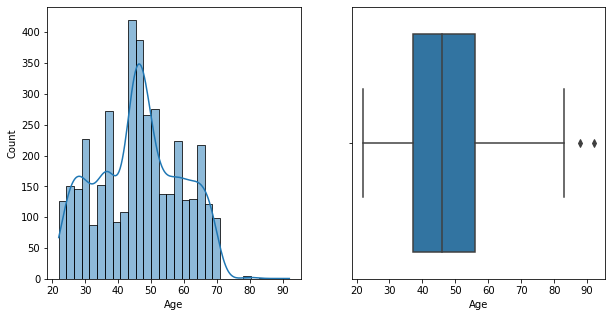

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for histogram and boxplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram without KDE
sns.histplot(data=custdemo, x='Age', kde=True, ax=axs[0])

# Plot boxplot
sns.boxplot(x='Age', data=custdemo, ax=axs[1])

# Show the plots
plt.show()

Since is `Age` key variable for our analysis, we will try to deal with the missing values and impute it.

We can see that the variable `Age` is almost normally distributed. So we can use either of the central tendency values(mean/median) to deal with missing values.

**Here we will use median to impute the values.**

In [122]:
custdemo.Age = custdemo.Age.fillna(custdemo.Age.median())
custdemo[custdemo.Age.isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Unnamed: 13,Age


We can also drop the DOB column now is it is not needed.

In [123]:
custdemo.drop('DOB',axis=1, inplace=True)

In [124]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3911 entries, 0 to 3912
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3911 non-null   int64   
 1   first_name                           3911 non-null   category
 2   last_name                            3790 non-null   category
 3   gender                               3911 non-null   category
 4   past_3_years_bike_related_purchases  3911 non-null   int64   
 5   job_title                            3911 non-null   category
 6   job_industry_category                3911 non-null   category
 7   wealth_segment                       3911 non-null   category
 8   deceased_indicator                   3911 non-null   category
 9   owns_car                             3911 non-null   category
 10  tenure                               3911 non-null   float64 
 11  Unnamed: 13           

In [125]:
custdemo.drop('Unnamed: 13',axis=1, inplace=True)

## RFM Analysis

RFM analysis is like a secret code that helps businesses figure out which customers are the best. It looks at three things:

1. **Recency**: This means how recently a customer has shopped with the business. If someone just bought something, they have high recency.

2. **Frequency**: This is about how often a customer shops. If someone shops a lot, they have high frequency.

3. **Monetary Value**: This looks at how much money a customer spends. If someone spends a lot, they have high monetary value.

So, when a business does RFM analysis, they can group their customers into different categories. The customers who shop a lot, recently, and spend a bunch of money are like gold. The business gives them special deals and treats to keep them happy. It helps the business figure out who their best customers are and how to make them even happier.

**Merge all the 3 tables**

i.e. Transactions, CustomerDemographic and CustomerAddress

In [127]:
new_table = address.merge(pd.merge(left=transactions, right=custdemo, how='inner', on='customer_id'), on='customer_id',suffixes= ('_x', '_y'))

In [128]:
new_table.head()

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94,86,2017-12-23,False,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,3765,38,2017-04-06,True,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,5157,47,2017-05-11,True,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,9785,72,2017-01-05,False,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,13424,2,2017-02-21,False,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0


In [129]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          18978 non-null  int64         
 1   address                              18978 non-null  category      
 2   postcode                             18978 non-null  int64         
 3   state                                18978 non-null  category      
 4   country                              18978 non-null  category      
 5   property_valuation                   18978 non-null  int64         
 6   transaction_id                       18978 non-null  int64         
 7   product_id                           18978 non-null  int64         
 8   transaction_date                     18978 non-null  datetime64[ns]
 9   online_order                         18978 non-null  object        
 10  order_stat

In [130]:
new_table.customer_id.nunique()

3410

#### `Recency` refers to how recently a customer has made a purchase. Customers who have made a purchase more recently are considered to be more valuable than those who have not made a purchase in a while.

In [131]:
sorted_table = new_table.sort_values(by='transaction_date')
comparison_date = sorted_table['transaction_date'].iloc[0]
comparison_date

Timestamp('2017-01-01 00:00:00')

In [132]:
# check recency

new_table['recency'] = new_table['transaction_date'] - comparison_date

In [133]:
new_table.head(1)

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,recency
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94,86,2017-12-23,False,...,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0,356 days


In [134]:
rec_values = new_table.recency.astype(str).str.split(' ')
new_table['recency'] = rec_values.str[0]
new_table['recency'] = new_table['recency'].astype('int64')

In [135]:
new_table.head(1)

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,recency
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94,86,2017-12-23,False,...,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0,356


#### **`Frequency` refers to how often a customer makes purchases. Customers who make more frequent purchases are considered to be more valuable than those who make purchases less frequently.**

#### **`Monetary` value refers to the amount of money a customer has spent on purchases. Customers who have spent more money are considered to be more valuable than those who have spent less money.**

In [136]:
pivot_table = pd.pivot_table(new_table, index='customer_id',values=['product_id','recency','Profit'],
               aggfunc={'product_id': 'count','recency': 'min','Profit': 'sum'})

pivot_table = pivot_table.rename(columns={'product_id': 'frequency',
                                          'Profit': 'monetary value'})

pivot_table

,monetary value,frequency,recency
customer_id,,,
1,3018.09,11,4
2,2226.26,3,123
4,220.57,2,92
5,2394.94,6,61
6,3946.55,5,27
...,...,...,...
3496,2045.84,4,65
3497,1648.32,3,243
3498,3147.33,6,33


In [137]:
pivot_table.describe()

,monetary value,frequency,recency
count,3410.000000,3410.000000,3410.000000
mean,3061.906792,5.565396,63.080059
std,1746.736482,2.291074,61.213985
min,15.080000,1.000000,0.000000
25%,1795.475000,4.000000,18.000000
50%,2789.250000,5.000000,44.000000
75%,4101.542500,7.000000,90.000000
max,11668.950000,14.000000,356.000000


### Calculating R Score, where a greater value indicates the product was purchased recently

In [138]:
for index, row in pivot_table.iterrows():
    if row['recency'] > 90:
        pivot_table.loc[index, 'R_score'] = 4
    elif row['recency'] > 44:
        pivot_table.loc[index, 'R_score'] = 3
    elif row['recency'] > 18:
        pivot_table.loc[index, 'R_score'] = 2
    elif row['recency'] > 0: 
        pivot_table.loc[index, 'R_score'] = 1
    else:
        pivot_table.loc[index, 'R_score'] = 0

### Calculating F Score, where a greater value indicates customers who have purchased products most frequently.

In [139]:
for index, row in pivot_table.iterrows():
    if row['frequency']  > 7:
        pivot_table.loc[index,'F_score'] = 4
    elif row['frequency']  > 5:
        pivot_table.loc[index,'F_score'] = 3
    elif row['frequency'] > 4:
        pivot_table.loc[index, 'F_score'] = 2
    elif row['frequency'] > 1: 
        pivot_table.loc[index,'F_score'] = 1
    else:
        pivot_table.loc[index,'F_score'] = 0

### Calculating M Score, where a greater value indicates customers who have spent more money. Hence are considered to be more valuable than those who have spent less money

In [140]:
for index,row in pivot_table.iterrows():
    if row['monetary value'] > 4120.25:
        pivot_table.loc[index,'M_score'] = 4
    elif row['monetary value'] > 2795.78:
        pivot_table.loc[index, 'M_score'] = 3
    elif row['monetary value'] > 1796.89:
        pivot_table.loc[index, 'M_score'] = 2
    elif row['monetary value'] > 15.08: 
        pivot_table.loc[index, 'M_score'] = 1
    else:
        pivot_table.loc[index, 'M_score'] = 0

In [141]:
pivot_table['RFM_value'] = (pivot_table['R_score']*100) + (pivot_table['F_score']*10) + pivot_table['M_score']

In [142]:
pivot_table.head()

,monetary value,frequency,recency,R_score,F_score,M_score,RFM_value
customer_id,,,,,,,
1,3018.09,11,4,1.0,4.0,3.0,143.0
2,2226.26,3,123,4.0,1.0,2.0,412.0
4,220.57,2,92,4.0,1.0,1.0,411.0
5,2394.94,6,61,3.0,3.0,2.0,332.0
6,3946.55,5,27,2.0,2.0,3.0,223.0


In [143]:
pivot_table['RFM_value'].describe()

count    3410.000000
mean      272.396774
std       111.393220
min        11.000000
25%       144.000000
50%       244.000000
75%       344.000000
max       444.000000
Name: RFM_value, dtype: float64

## Segmenting


#### Now, we can classify customers into different segments on the basis of RFM value

In [145]:
for index,row in pivot_table.iterrows():
    if row['RFM_value'] > 344:
        pivot_table.loc[index,'Customer Profile'] = 'Platinum Customer'
    elif row['RFM_value'] > 244:
        pivot_table.loc[index, 'Customer Profile'] = 'Gold Customer'
    elif row['RFM_value'] > 144:
        pivot_table.loc[index, 'Customer Profile'] = 'Silver Customer'
    else:
        pivot_table.loc[index, 'Customer Profile'] = 'Bronze Customer'

In [146]:
pivot_table.head()

,monetary value,frequency,recency,R_score,F_score,M_score,RFM_value,Customer Profile
customer_id,,,,,,,,
1,3018.09,11,4,1.0,4.0,3.0,143.0,Bronze Customer
2,2226.26,3,123,4.0,1.0,2.0,412.0,Platinum Customer
4,220.57,2,92,4.0,1.0,1.0,411.0,Platinum Customer
5,2394.94,6,61,3.0,3.0,2.0,332.0,Gold Customer
6,3946.55,5,27,2.0,2.0,3.0,223.0,Silver Customer


In [147]:
pivot_table.to_excel('RFM.xlsx', index=False)

Assumptions to be clarified:
    
1. **Age Matters**: Younger customers might buy more bikes compared to older customers. This could be because younger people want to save money in their early years, drive more frequently, and prioritize factors like cost over comfort, unlike older customers who may value comfort more.

2. **Gender Influence**: It's possible that males are more willing to buy bikes than females. This could be because males may not be as concerned about factors like outfit discomfort and place a higher emphasis on other aspects when making purchasing decisions.

3. **Industry Impact**: We need to explore if people from certain industries are more likely to buy bikes than others. There could be industry-specific reasons influencing purchase behavior.

# Data Visualization

## 1.Customer Segments

In [148]:
cust_seg = pd.pivot_table(pivot_table, index='Customer Profile', values='RFM_value',aggfunc='sum')
cust_seg

,RFM_value
Customer Profile,
Bronze Customer,108246.0
Gold Customer,274802.0
Platinum Customer,351134.0
Silver Customer,194691.0


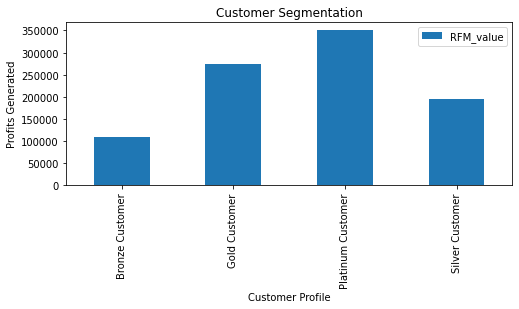

In [149]:
cust_seg.plot(kind='bar', figsize=(8,3))
plt.xlabel('Customer Profile')
plt.ylabel('Profits Generated')
plt.title('Customer Segmentation')
plt.show()

In [150]:
pivot_table.groupby(by='Customer Profile').size().sort_values()

Customer Profile
Platinum Customer    838
Gold Customer        844
Silver Customer      855
Bronze Customer      873
dtype: int64

Inference - Platinum Customers are the most valuable for the business because they have the highest RFM value, meaning they bring in the most revenue. Currently, the majority of our customers fall into the Bronze category. This suggests that there is a significant opportunity to upgrade them to become Platinum Customers.

## 2. Industry that generates highest profit

In [151]:
ind_profit = pd.pivot_table(new_table, index='job_industry_category', values='Profit', aggfunc='sum')
ind_profit

,Profit
job_industry_category,
Argiculture,300566.24
Entertainment,380207.91
Financial Services,2092189.00
Health,1611177.33
IT,372140.03
Manufacturing,3849479.05
Property,685473.43
Retail,963206.73
Telecommunications,186662.44


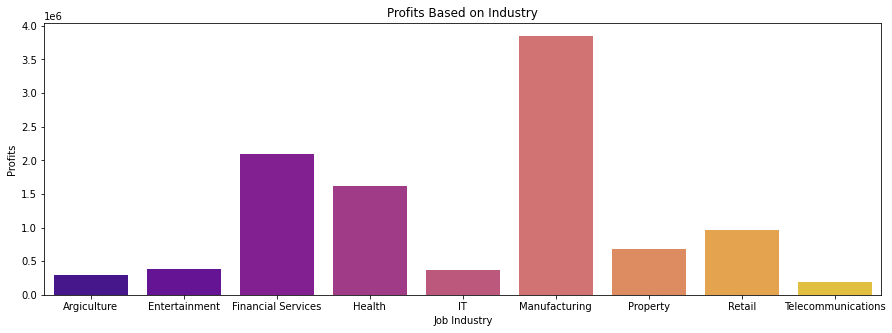

In [153]:
plt.figure(figsize=(15,5))
sns.barplot(data=ind_profit, x=ind_profit.index,y='Profit',palette = 'plasma')
plt.xlabel('Job Industry')
plt.ylabel('Profits')
plt.title('Profits Based on Industry')
plt.show()

Inference - Very clearly Manufacturing, Financial Servies and Healthcare are the industries which drive maximum profits for us. And, industries like agriculture, entertainment make the least profits.

## 3. Bike related purchases Based on Industry

In [154]:
bike_industry = pd.pivot_table(new_table, index='job_industry_category', values='past_3_years_bike_related_purchases',aggfunc='count')
bike_industry

,past_3_years_bike_related_purchases
job_industry_category,
Argiculture,559
Entertainment,686
Financial Services,3731
Health,2984
IT,686
Manufacturing,7012
Property,1251
Retail,1718
Telecommunications,351


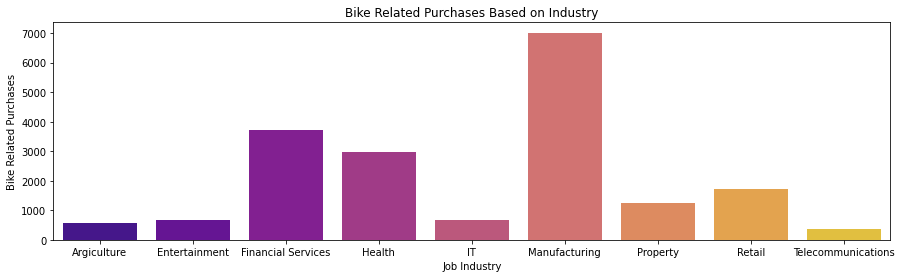

In [155]:
plt.figure(figsize=(15,4))
sns.barplot(data=bike_industry, x=bike_industry.index,y='past_3_years_bike_related_purchases', palette = 'plasma')
plt.xlabel('Job Industry')
plt.ylabel('Bike Related Purchases')
plt.title('Bike Related Purchases Based on Industry')
plt.show()

Inference - From the above, have seen that our sales to turn into revenues. So, there seems to be no problem with our costs, seeling prices etc. If we sell more, we are likely to generate more profits also.

## 4.Wealth Segments and Age

In [156]:
age_demo = pd.pivot_table(new_table, index = 'Age', values = ['Profit'])
age_demo.head()

,Profit
Age,
22.0,542.422313
23.0,591.267337
24.0,592.209242
25.0,548.988065
26.0,523.782975


In [157]:
bins = np.arange(18,100,10)

age_demo['age_bin'] = pd.cut(age_demo.index, bins=bins)
profit_by_age = age_demo.groupby('age_bin')['Profit'].sum(_

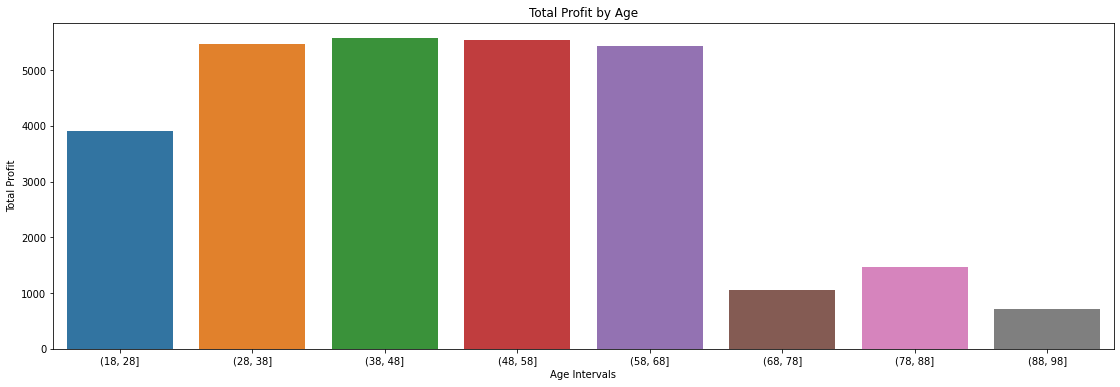

In [158]:
plt.figure(figsize=(19,6))
sns.barplot(data = age_demo, x=profit_by_age.index.astype(str), y=profit_by_age)

plt.xlabel('Age Intervals')
plt.ylabel('Total Profit')
plt.title('Total Profit by Age')
plt.show()

In [159]:
wealth_seg = new_table.groupby(by='wealth_segment').size().sort_values()
wealth_seg

wealth_segment
Affluent Customer    4627
High Net Worth       4843
Mass Customer        9508
dtype: int64

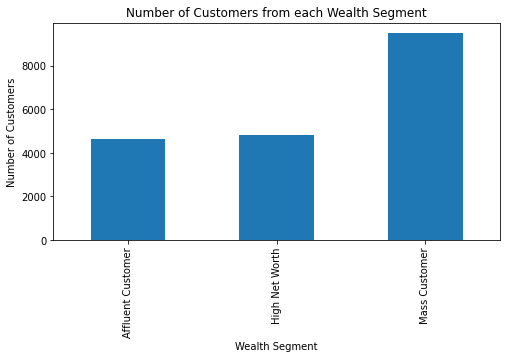

In [160]:
plt.figure(figsize=(8,4))
wealth_seg.plot(kind='bar')
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers from each Wealth Segment')
plt.show()

## 5. Car owned in different states

In [162]:
car = pd.pivot_table(new_table, index=['state'],columns='owns_car',values=['customer_id'],aggfunc='count')
car.columns = car.columns.droplevel()
car = car.rename(columns={'no':'owns_no', 'yes':'owns_yes'})
car

owns_car,No,Yes
state,,
New South Wales,4924,5201
QLD,2043,2022
Victoria,2483,2305


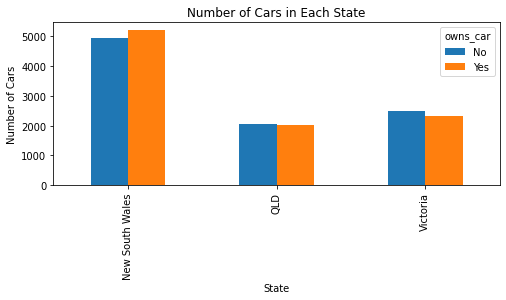

In [163]:
car.plot(kind='bar', figsize=(8,3))
plt.xlabel('State')
plt.ylabel('Number of Cars')
plt.title('Number of Cars in Each State')
plt.show()

Inference - We can see that New South Wales is has a potential market.

## 6.Bike related purchases based on state

In [164]:
bike_state = pd.pivot_table(new_table, index='state', values='past_3_years_bike_related_purchases',aggfunc='count')
bike_state

,past_3_years_bike_related_purchases
state,
New South Wales,10125
QLD,4065
Victoria,4788


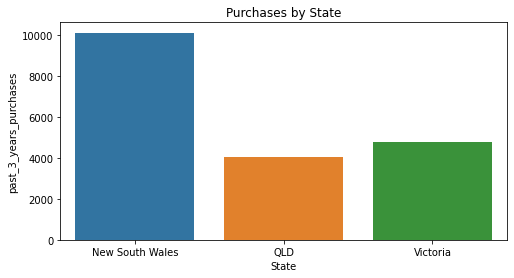

In [165]:
plt.figure(figsize=(8,4))
sns.barplot(data = bike_state, x=bike_state.index, y='past_3_years_bike_related_purchases')
plt.title('Purchases by State')
plt.xlabel('State')
plt.ylabel('past_3_years_purchases')
plt.show()

## 7. Bike related purchases based on gender

In [166]:
bike_gender = pd.pivot_table(new_table, index='gender', values='past_3_years_bike_related_purchases',aggfunc='count')
bike_gender

,past_3_years_bike_related_purchases
gender,
Female,9728
Male,9242
U,8


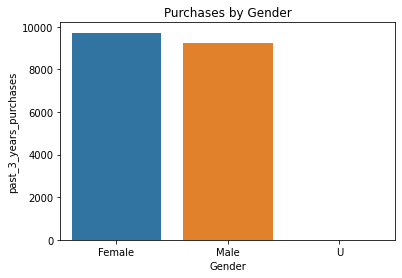

In [167]:
sns.barplot(data = bike_gender, x=bike_gender.index, y='past_3_years_bike_related_purchases')
plt.title('Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('past_3_years_purchases')
plt.show()

## Summary Observations:

1. **Age Influence**: Contrary to our initial assumptions, customers aged between 28 and 68 made the most purchases. This age group represents a significant portion of our customer base.

2. **Gender Neutrality**: Gender did not exhibit a substantial impact on purchase behavior. Both males and females showed a similar propensity to make purchases, with no significant differences observed.

3. **Industry Insights**: The Manufacturing, Financial Services, and Healthcare sectors stood out as the primary sources of our customer base. These industries accounted for a substantial number of our customers and showed a higher likelihood of making purchases.

In light of these observations, it is recommended that the firm focuses its expansion efforts on targeting customers within the age range of 28 to 68, irrespective of gender. Additionally, exploring the market potential in New South Wales presents an appealing opportunity, although a comprehensive analysis is advised before taking action. Furthermore, it is essential to conduct a thorough examination of the factors contributing to the lower purchase rates in other industries to devise strategies for converting them into potential customers.

### Customers that the firm should Target

In [168]:
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [169]:
# Convert the DOB column to datetime format
newcust['DOB'] = pd.to_datetime(newcust['DOB'])

# Calculate the age using today's date and the DOB
today = pd.Timestamp(date.today())
age1 = (today - newcust['DOB']) / pd.Timedelta(days=365)

newcust['Age'] = age1.round().astype('Int64')

# Print the resulting DataFrame
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,54
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,45
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58


In [170]:
newcust[(newcust['wealth_segment']=='Mass Customer') & (newcust['Age'] >27) & (newcust['Age'] <69) &
       (newcust['job_industry_category'].isin(['Manufacturing','Financial Services','Health']) &
        (newcust['state']=='NSW'))]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875,47
8,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250,51
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,4,0591 Anzinger Circle,2232,NSW,Australia,10,14,1.593750,47
20,Teddie,Burchill,Male,11,1968-12-21,Programmer I,Manufacturing,Mass Customer,N,Yes,13,321 Raven Plaza,2161,NSW,Australia,9,21,1.515625,55
21,Gaston,Dallaghan,Male,44,1993-09-29,Financial Analyst,Financial Services,Mass Customer,N,Yes,8,656 Fuller Street,2783,NSW,Australia,7,21,1.515625,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Lezlie,Clemits,Female,2,1973-05-30,Senior Cost Accountant,Financial Services,Mass Customer,N,Yes,15,0504 Nevada Drive,2155,NSW,Australia,10,924,0.488750,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,61
960,Sonia,Dunstall,Female,0,1975-07-30,Accountant III,Financial Services,Mass Customer,N,No,10,99 Park Meadow Hill,2570,NSW,Australia,9,960,0.442000,48
964,Jammie,Seldner,Female,42,1975-02-25,Human Resources Manager,Health,Mass Customer,N,Yes,15,8 Saint Paul Junction,2066,NSW,Australia,10,963,0.440000,49


## We have found out these 99 customers from 1000 new customers that the firm should target in order to derive most value for the organization